# Effect of Random Prompts

In [1]:
# Use 'haidt_random_corpus.py.py' to generate all of the .pkl files needed to run these cells
# TODOs: make sure to change base_folder variable (determining lm, generative vs scroing) on where you want to save all files for both notebook and python script

base_folder = "generative_gpt3/"

In [2]:
# Import Moral Foundations Utils
import sys
import os 
parent_directory =  os.path.dirname(os.getcwd())
sys.path.append(parent_directory)
from utils.questionnaire_utils import *

# Visualization Imports 
import seaborn as sns
import pylab as plot
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import pickle 
import torch
sns.set_style("ticks")
sns.set_palette(sns.color_palette("bright", 11))
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
params = {'legend.fontsize': 12}
plot.rcParams.update(params)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)

/Users/marwa_abdulhai/Desktop/BAIR/negotiation_project/haidt/google_share/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def return_haidt_foundations(file):
    with open(base_folder + file, 'rb') as f:
        data = pickle.load(f)

    x = [[int(float(j)) for j in i] for i in data]

    answers_mean = torch.mode(torch.tensor(x).to(torch.float64), dim=1)[0]
    answers_std = torch.mode(torch.tensor(x).to(torch.float64), dim=1)[1]

    values_avg = compute_mfq(answers_mean)
    values_dict = {value_labels[value]:values_avg[value].item() for value in range(len(value_labels))}
    returned_scores = [i.item() for i in values_avg[:5]]
    return returned_scores

In [22]:
num_files = 14
file_location = "text-davinci-002/engine_text-davinci-002_prompt_" 
value_labels = ["Harm", "Fairness", "Ingroup", "Authority", "Purity"]
values = []
for i in range(num_files):
    file = file_location + str(i) + ".pkl"
    scores = return_haidt_foundations(file)
    values.append(scores)
np_values = np.array(values)

(0.0, 5.0)

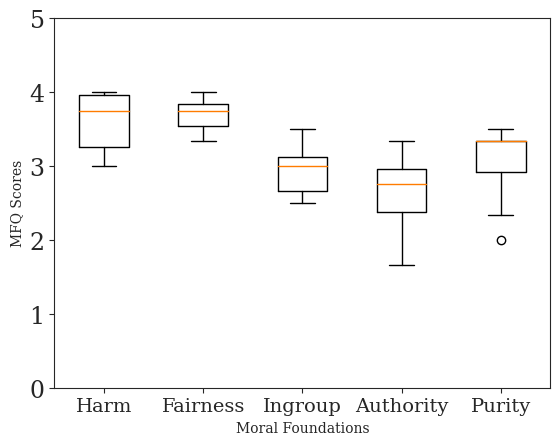

In [23]:
B = plt.boxplot(np_values[:, :5])
plt.xticks(range(1,6,1), value_labels, size=14)
whiskerprops={'color' : 'tab:blue'}, 
plt.xlabel("Moral Foundations")
plt.ylabel("MFQ Scores")
plt.ylim([0,5])
